For our final project, we wanted to look at the relationship between world happiness ratings and a country's investment in education. We found two data sets, one with world happiness report data and the other with a coutry's percentage of GDP allocated to education data. We hypothesize that an increase in the percentage of GDP allocated to education would increase a country's world happiness rating and that the percentage of GDP allocated to education could be used to predict a country's happiness rating.

To start, we import our necessary libraries and cleaned our data. The steps we take below are to remove NaN values, drop unwanted values, merge the data sets, and reorient them so that we can analyze them efficiently in the future.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
WHR = pd.read_csv("world-happiness-report-2021.csv")
eInvestment_dirty = pd.read_csv("educational investment.csv")

In [3]:
columns = eInvestment_dirty.iloc[3]
eInvestment_dirty.columns = columns
eInvestment_dirty.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,2021-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.00000,2013.00000,2014.00000,2015.00000,2016.00000,2017.0,2018.0,2019.0,2020.0,NaN
4,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.54906,6.50538,5.90521,5.97571,5.52415,NaN,NaN,NaN,NaN,NaN


In [4]:
eInvestment_semi = eInvestment_dirty.drop([0,1,2,3])
index = list(range(len(eInvestment_semi)))
eInvestment_semi = eInvestment_semi.reset_index()
eInvestment_semi = eInvestment_semi.drop(columns = "index")
eInvestment_semi.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.54906,6.50538,5.90521,5.97571,5.52415,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN,NaN,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN,NaN,NaN,NaN
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.50616,3.07421,3.28035,3.23707,3.21709,3.24672,3.15162,NaN,NaN


In [5]:
eInvestment_clean = eInvestment_semi[["Country Name", "Country Code", "Indicator Name", "Indicator Code", 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0]]
eInvestment_clean.columns.values[0] = "Country name"
eInvestment_clean.head()

3,Country name,Country Code,Indicator Name,Indicator Code,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,6.92927,6.11913,6.54906,6.50538,5.90521,5.97571,5.52415,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,3.42132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,2.97663,2.98706,NaN,2.50616,3.07421,3.28035,3.23707,3.21709,3.24672


In [6]:
WHR.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [7]:
WHR = WHR.sort_values(by=["Country name"])
index = list(range(len(WHR)))
WHR = WHR.reset_index()
WHR = WHR.drop(columns = "index")
WHR.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
1,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,-0.030,0.901,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250
2,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,-0.182,0.834,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,-0.168,0.629,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127


In [8]:
happy_dirty = WHR.merge(eInvestment_clean, how = "left", on = "Country name")
happy_dirty.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Indicator Code,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,SE.XPD.TOTL.GD.ZS,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
1,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,...,SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN
2,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,...,SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,SE.XPD.TOTL.GD.ZS,5.01971,5.29063,5.34583,5.43661,5.36144,5.77611,5.54549,5.46223,NaN
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,SE.XPD.TOTL.GD.ZS,3.24900,3.14385,2.77248,2.65018,2.24724,2.80591,2.75812,2.70759,NaN


In [9]:
happy_semi = happy_dirty.drop(columns = "Indicator Code")
happy_semi = happy_semi.drop(columns = "Indicator Name")
happy_semi.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Country Code,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,AFG,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
1,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,...,ALB,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN
2,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,...,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,ARG,5.01971,5.29063,5.34583,5.43661,5.36144,5.77611,5.54549,5.46223,NaN
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,ARM,3.24900,3.14385,2.77248,2.65018,2.24724,2.80591,2.75812,2.70759,NaN


In [10]:
happy = happy_semi.dropna(subset= [2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0])
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Country Code,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,AFG,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,ARG,5.01971,5.29063,5.34583,5.43661,5.36144,5.77611,5.54549,5.46223,NaN
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,ARM,3.24900,3.14385,2.77248,2.65018,2.24724,2.80591,2.75812,2.70759,NaN
5,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.900,0.914,...,AUS,5.55006,5.07451,4.86900,5.22974,5.16477,5.31127,5.27678,5.12425,NaN
6,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,...,AUT,5.70048,5.59227,5.48040,5.54711,5.44762,5.45658,5.48435,5.35804,NaN


In [11]:
index = list(range(len(happy)))
happy = happy.reset_index()
happy = happy.drop(columns = "index")
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Country Code,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,AFG,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
1,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,ARG,5.01971,5.29063,5.34583,5.43661,5.36144,5.77611,5.54549,5.46223,NaN
2,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,ARM,3.24900,3.14385,2.77248,2.65018,2.24724,2.80591,2.75812,2.70759,NaN
3,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.900,0.914,...,AUS,5.55006,5.07451,4.86900,5.22974,5.16477,5.31127,5.27678,5.12425,NaN
4,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,...,AUT,5.70048,5.59227,5.48040,5.54711,5.44762,5.45658,5.48435,5.35804,NaN


In [12]:
happy = happy.drop(columns = 2016)
happy = happy.drop(columns = 2017)
happy = happy.drop(columns = 2018)
happy

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Country Code,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,0.122,0.010,1.895,AFG,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580
1,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,0.069,0.067,2.461,ARG,5.01971,5.29063,5.34583,5.43661,5.36144,5.77611
2,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,0.079,0.198,2.127,ARM,3.24900,3.14385,2.77248,2.65018,2.24724,2.80591
3,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.900,0.914,...,0.291,0.317,2.598,AUS,5.55006,5.07451,4.86900,5.22974,5.16477,5.31127
4,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,...,0.215,0.292,2.784,AUT,5.70048,5.59227,5.48040,5.54711,5.44762,5.45658
5,Azerbaijan,Commonwealth of Independent States,5.171,0.040,5.250,5.091,9.569,0.836,65.656,0.814,...,0.043,0.276,1.919,AZE,2.78062,2.43564,2.06763,2.44213,2.63304,2.95168
6,Belarus,Commonwealth of Independent States,5.534,0.047,5.625,5.442,9.853,0.910,66.253,0.650,...,0.070,0.199,2.247,BLR,5.22004,4.68479,4.95964,5.00942,4.81831,4.78752
7,Brazil,Latin America and Caribbean,6.330,0.043,6.415,6.245,9.577,0.882,66.601,0.804,...,0.142,0.117,3.015,BRA,5.64880,5.73741,5.85510,5.83885,5.94848,6.24106
8,Burkina Faso,Sub-Saharan Africa,4.834,0.081,4.993,4.675,7.678,0.672,54.151,0.695,...,0.182,0.122,3.133,BFA,3.50223,3.98515,3.60316,4.08344,4.05330,3.67009
9,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,...,0.172,0.212,2.876,BDI,6.77525,6.31925,6.16786,5.99536,6.78452,6.37054


In [13]:
len(happy.columns)
happy.columns[0:21]
d = pd.melt(happy, id_vars=["Country name", "Regional indicator", "Ladder score",
                           "Standard error of ladder score", "upperwhisker", "lowerwhisker", 
                           "Logged GDP per capita", "Social support", "Healthy life expectancy",
                           "Freedom to make life choices", "Generosity", "Perceptions of corruption",
                           "Ladder score in Dystopia", "Explained by: Log GDP per capita",
                           "Explained by: Social support", "Explained by: Healthy life expectancy",
                           "Explained by: Freedom to make life choices", "Explained by: Generosity",
                           "Explained by: Perceptions of corruption", "Dystopia + residual", "Country Code"
                           ], value_vars=[2010,2011,2012,2013,2014,2015], var_name="Year", value_name="% of GDP on Education")
d

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Country Code,Year,% of GDP on Education
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,0.370,0.000,0.126,0.000,0.122,0.010,1.895,AFG,2010,3.47945
1,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,1.162,0.980,0.646,0.544,0.069,0.067,2.461,ARG,2010,5.01971
2,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,0.996,0.758,0.585,0.540,0.079,0.198,2.127,ARM,2010,3.24900
3,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.900,0.914,...,1.453,1.076,0.801,0.647,0.291,0.317,2.598,AUS,2010,5.55006
4,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,...,1.492,1.062,0.782,0.640,0.215,0.292,2.784,AUT,2010,5.70048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Sri Lanka,South Asia,4.325,0.066,4.454,4.196,9.470,0.827,67.299,0.841,...,0.990,0.820,0.593,0.559,0.239,0.049,1.075,LKA,2015,2.22875
350,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.700,0.945,...,1.478,1.062,0.763,0.685,0.244,0.448,2.683,SWE,2015,7.44390
351,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,1.566,1.079,0.816,0.653,0.204,0.413,2.839,CHE,2015,5.10057
352,Togo,Sub-Saharan Africa,4.107,0.077,4.258,3.956,7.362,0.569,54.914,0.619,...,0.254,0.239,0.203,0.289,0.209,0.107,2.806,TGO,2015,5.10860


Now that we have our data completely cleaned and manipulated, we have a total of 354 points to analyze. To start our analysis, we want to visualize the data to visually inform us on trends and to help us better understand the information we are working with. Considering that our target features are the percentage of GDP allocated towards education and a county's world happiness report, we thought it would be meaningful to see if there was some sort of relationship by plotting a scatterplot.

Text(0, 0.5, 'Percent of GDP Allocated to Education')

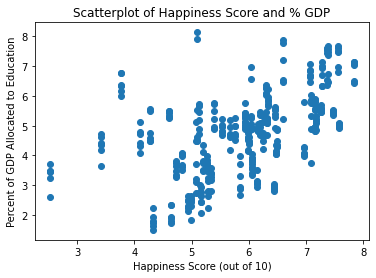

In [14]:
plt.scatter(x=d["Ladder score"], y=d["% of GDP on Education"])
plt.title("Scatterplot of Happiness Score and % GDP")
plt.xlabel("Happiness Score (out of 10)")
plt.ylabel("Percent of GDP Allocated to Education")

From this scatter plot, as hypothesized, it seems that there is a general increase in happiness ratings as the percent of GDP allocated towards education increases. To further explore this information visually, we want to use a heatmap to colorize this information and show more clearly the relationship between these variables. 

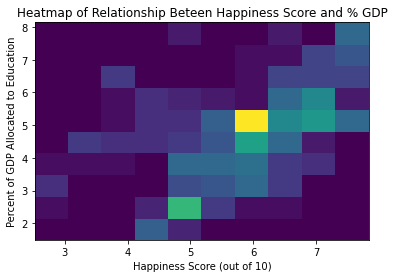

In [15]:
Z, hmx, hmy = np.histogram2d(d["Ladder score"], d["% of GDP on Education"])

plt.title("Heatmap of Relationship Beteen Happiness Score and % GDP")
plt.xlabel("Happiness Score (out of 10)")
plt.ylabel("Percent of GDP Allocated to Education")
plt.pcolormesh(hmx,hmy,Z.T)

plt.show()

The heatmap helps to colorize the relationship and give life to the population densities of each value pairing. Again, a linear relationship can be observed, further supporting our hypothesis. An extra visualization we feel is valuable is box plots to understand the ranges and distributions of the two variables we are looking at. 

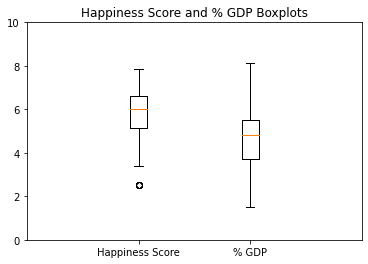

In [16]:
bp = plt.boxplot([d["Ladder score"], d["% of GDP on Education"]])

plt.title("Happiness Score and % GDP Boxplots")
plt.xticks([1,2],["Happiness Score","% GDP"])
plt.xlim([0,3])
plt.ylim([0,10])

plt.show()

The above box plot helped us understand the distribution of the data we are working with. Now that we have visualized our data in numerous ways, we will now create a linear regression to attempt to predict happiness ratings based on a country's percentage of GDP allocated towards education. We chose to implement this model as our problem is not categorical and linear regresssions lend well to continous data. 

Here we have our implementation of a linear regression. We split our data into testing and training groups, with the test size being 25% of the data. We created a linear regression model that we then fit the training data to. We then used this same model to predict our testing data. Finally, we calculated the mean squarred error between the predicted and true data to help us analyze our model. 

In [17]:
x = d[["% of GDP on Education"]]
y = d["Ladder score"]
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size = .25)
reg = LinearRegression()
reg.fit(x_tr,y_tr)
print("Test Group Score (R^2):", reg.score(x_te,y_te))
print("Training Group Score (R^2):", reg.score(x_tr,y_tr))
predict = reg.predict(x_te)
mae = mean_squared_error(y_te,predict)
print("Mean Squared Error:", mae)

Test Group Score (R^2): 0.2533396653447192
Training Group Score (R^2): 0.27958083846003257
Mean Squared Error: 0.9479544606093726


To help us visualize the linear regression we have just created, we decided to plot the model, both with its predicition and its actual values. 

<function matplotlib.pyplot.show(close=None, block=None)>

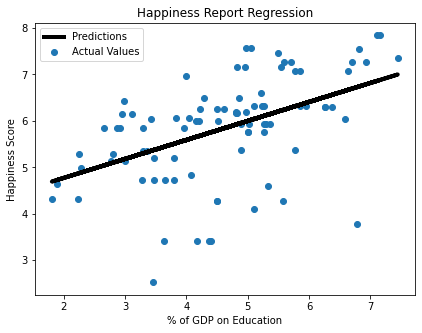

In [18]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
plt.scatter(x_te,y_te)
plt.plot(x_te, predict, 'k',linewidth=4)
plt.legend(["Predictions", "Actual Values"])
plt.title("Happiness Report Regression")
plt.xlabel("% of GDP on Education")
plt.ylabel("Happiness Score")
plt.show

As visible in the above graph, it appears that the linear regression was implemented well. One thing we wanted to note about our linear regression was that the mean squared error was quite low, being about 1. While this mean squared error would be a great result, we understand by looking at our data that the spread is a bit too large for this model to predict as well as the mean squarred error suggests. While we are extemely happy with the results of our model and feel it supports our hypothesis, we want to note that there is likely some overfitting, as indicated by the extremely low mean squared error. 

Considering that only one machine learning model may not fully reflect the data perfectly, we wanted to explore some other machine learning methods. While our data lends extremenly well to a linear regression, creating a dummy variable that identifies if the happiness score is above 6 or below 6 (being approximately the mean; found utilizing our box plot) allows us to preform both a logistic regression of the data as well as utilize a decision tree model and treat our problem as a categorical problem. The creation of this dummy variable is below.  

In [21]:
d["dummy"] = 0
for i in range(len(d)):
    if(d.iloc[i,2]>6):
        d.iloc[i,23] = 1
d

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Country Code,Year,% of GDP on Education,dummy
0,0,6,0,5,0,0,7,0,1,0,...,0,1,0,19,1,4,0,0,75,0
1,1,3,26,17,27,26,32,31,36,25,...,33,34,25,6,15,18,1,0,207,1
2,2,1,19,19,18,19,24,16,24,24,...,17,24,24,8,38,9,2,0,61,1
3,3,5,49,7,50,49,50,42,52,46,...,45,50,46,52,45,25,3,0,273,1
4,4,9,50,4,51,50,54,39,48,43,...,42,46,44,36,43,33,4,0,281,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,54,6,5,23,5,5,23,21,27,27,...,22,26,28,39,8,0,32,5,13,0
350,55,9,52,4,53,51,51,39,46,51,...,42,44,51,41,51,30,56,5,339,1
351,56,9,56,4,56,55,57,44,53,47,...,46,51,47,32,48,39,10,5,214,1
352,57,8,3,31,3,3,2,3,6,1,...,3,6,1,35,25,36,57,5,218,0


Below we ran a logistic regression on our data using our dummy variable. First we endcoded the values of our data so they would lend best to the numerical nature of a logistic regression. Then we again created a test and train split, however this time with our target being the dummy variable instead of simply the happiness rating. We created a logistic regression model, fit it with our training sets, and made predictions using our testing set. We then calculated the testing and training accuracies to inform us on the accuracy of the model.

In [22]:
enc = LabelEncoder()
for i in d.columns:
    d[i] = enc.fit_transform(d[i])
    
x = d[["% of GDP on Education"]]
y = d["dummy"]
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size = .25)
model = LogisticRegression()
model.fit(x_tr, y_tr)
pred_tr = model.predict(x_tr)
pred_te = model.predict(x_te)

print("Test Accuracy: ", accuracy_score(y_te , pred_te))
print("Training Accuracy: ", accuracy_score(y_tr, pred_tr))

Test Accuracy:  0.8651685393258427
Training Accuracy:  0.8867924528301887


Excitingly, as one can see, our training and testing accuracies were relatively high. This supports our hypothesis that the percent of GDP allocated to education could be used to predict a country's happiness ratings well. While these results are strong, we still wanted to further explore our data using a different machine learning model. We decided we wanted to see if there were any differences in the accuracies if a decision tree model was used instead. Below we implemented this alogirthm. Again, we created a model that we fit with the testing data. We again made predictions using our testing set and then calculated the testing and training accuracies to inform us on the accuracy of the model. The same feature and target as used in the logistic regression were used for the decision tree.   

In [23]:
d_model=tree.DecisionTreeClassifier(max_depth=5)
d_model.fit(x_tr, y_tr)
d_pred_tr = model.predict(x_tr)
d_pred_te = model.predict(x_te)
print("Train Accuracy: ", accuracy_score(y_tr, d_pred_tr))
print("Test Accuracy: ", accuracy_score(y_te, d_pred_te))

Train Accuracy:  0.8867924528301887
Test Accuracy:  0.8651685393258427


We found that the training and testing accuracies were extremely close for both the decision tree model and the logistic regression. Not only does this support that our hypothesis was correct, but this supports the integrity of both of these machine learning models. 

Overall, we were successfully able to create machine learning models that were able to predict the happiness rating of a country based off the percentage of the country's GDP that is allocated to education. This supports our initial hypothesis. For future directions, this same relationship could be explored with a larger data set. Our data set had only 354 points while an ideal machine learning model would contain a bit more. Therefore, future studies should look to add more information (more years, more contries, etc.) to attempt to increase the accuracy of the model. 